In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Library

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import kagglehub
import os
import shutil
from sklearn.cluster import KMeans
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics.pairwise import cosine_similarity
import tensorflow as tf
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Dot
from tensorflow.keras.optimizers import Adam

# Data Understanding

Melakukan download data dari `Kaggle` dan memindahkan dataset menuju `/content`

In [ ]:
# Download latest version
path = kagglehub.dataset_download("dbdmobile/myanimelist-dataset")

print("Original Path to dataset files:", path)

# Get the destination directory
destination_dir = "/content"

# Iterate through the files and directories within the downloaded dataset
for item in os.listdir(path):
    source_item = os.path.join(path, item)
    destination_item = os.path.join(destination_dir, item)

    if os.path.isdir(source_item):
        # For directories, use shutil.copytree to preserve directory structure
        shutil.copytree(source_item, destination_item, dirs_exist_ok=True)
    else:
        # For files, use shutil.copy2 to preserve metadata
        shutil.copy2(source_item, destination_item)

print(f"Files moved to: {destination_dir}")


100%|██████████| 1.80G/1.80G [00:12<00:00, 152MB/s]

Extracting files...


Original Path to dataset files: /root/.cache/kagglehub/datasets/dbdmobile/myanimelist-dataset/versions/5
Files moved to: /content


In [ ]:
data_path = os.listdir("/content")[1:-2]
data_path

['final_animedataset.csv',
 'user-filtered.csv',
 'users-details-2023.csv',
 'anime-filtered.csv',
 'users-score-2023.csv',
 'anime-dataset-2023.csv']

## Information Data


Melihat Informasi setiap data

### Data Anime

In [ ]:
anime_df = pd.read_csv('anime-dataset-2023.csv')
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24905 entries, 0 to 24904
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   anime_id      24905 non-null  int64 
 1   Name          24905 non-null  object
 2   English name  24905 non-null  object
 3   Other name    24905 non-null  object
 4   Score         24905 non-null  object
 5   Genres        24905 non-null  object
 6   Synopsis      24905 non-null  object
 7   Type          24905 non-null  object
 8   Episodes      24905 non-null  object
 9   Aired         24905 non-null  object
 10  Premiered     24905 non-null  object
 11  Status        24905 non-null  object
 12  Producers     24905 non-null  object
 13  Licensors     24905 non-null  object
 14  Studios       24905 non-null  object
 15  Source        24905 non-null  object
 16  Duration      24905 non-null  object
 17  Rating        24905 non-null  object
 18  Rank          24905 non-null  object
 19  Popu

In [ ]:
anime_filter_df = pd.read_csv('anime-filtered.csv')
anime_filter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14952 entries, 0 to 14951
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   anime_id       14952 non-null  int64  
 1   Name           14952 non-null  object 
 2   Score          14952 non-null  float64
 3   Genres         14952 non-null  object 
 4   English name   14952 non-null  object 
 5   Japanese name  14952 non-null  object 
 6   sypnopsis      13602 non-null  object 
 7   Type           14952 non-null  object 
 8   Episodes       14952 non-null  object 
 9   Aired          14952 non-null  object 
 10  Premiered      14952 non-null  object 
 11  Producers      14952 non-null  object 
 12  Licensors      14952 non-null  object 
 13  Studios        14952 non-null  object 
 14  Source         14952 non-null  object 
 15  Duration       14952 non-null  object 
 16  Rating         14952 non-null  object 
 17  Ranked         13231 non-null  float64
 18  Popula

### Data User Rating

In [ ]:
user_rating_df = pd.read_csv('user-filtered.csv')
user_rating_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109224747 entries, 0 to 109224746
Data columns (total 3 columns):
 #   Column    Non-Null Count      Dtype
---  ------    --------------      -----
 0   user_id   109224747 non-null  int64
 1   anime_id  109224747 non-null  int64
 2   rating    109224747 non-null  int64
dtypes: int64(3)
memory usage: 2.4 GB


In [ ]:
user_score_df = pd.read_csv( 'users-score-2023.csv')
user_score_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24325191 entries, 0 to 24325190
Data columns (total 5 columns):
 #   Column       Non-Null Count     Dtype 
---  ------       --------------     ----- 
 0   user_id      24325191 non-null  int64 
 1   Username     24324959 non-null  object
 2   anime_id     24325191 non-null  int64 
 3   Anime Title  24325191 non-null  object
 4   rating       24325191 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 927.9+ MB


### Data User Details

In [ ]:
user_details_df = pd.read_csv('users-details-2023.csv')
user_details_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731290 entries, 0 to 731289
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Mal ID            731290 non-null  int64  
 1   Username          731289 non-null  object 
 2   Gender            224383 non-null  object 
 3   Birthday          168068 non-null  object 
 4   Location          152805 non-null  object 
 5   Joined            731290 non-null  object 
 6   Days Watched      731282 non-null  float64
 7   Mean Score        731282 non-null  float64
 8   Watching          731282 non-null  float64
 9   Completed         731282 non-null  float64
 10  On Hold           731282 non-null  float64
 11  Dropped           731282 non-null  float64
 12  Plan to Watch     731282 non-null  float64
 13  Total Entries     731282 non-null  float64
 14  Rewatched         731282 non-null  float64
 15  Episodes Watched  731282 non-null  float64
dtypes: float64(10), int6

### Data Final Anime dataset

In [ ]:
final_anime_df = pd.read_csv('final_animedataset.csv')
final_anime_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35305695 entries, 0 to 35305694
Data columns (total 13 columns):
 #   Column      Non-Null Count     Dtype  
---  ------      --------------     -----  
 0   username    35305439 non-null  object 
 1   anime_id    35305695 non-null  int64  
 2   my_score    35305695 non-null  int64  
 3   user_id     35305695 non-null  int64  
 4   gender      35305695 non-null  object 
 5   title       35305695 non-null  object 
 6   type        35305695 non-null  object 
 7   source      35305695 non-null  object 
 8   score       35305695 non-null  float64
 9   scored_by   35305695 non-null  int64  
 10  rank        34553725 non-null  float64
 11  popularity  35305695 non-null  int64  
 12  genre       35303428 non-null  object 
dtypes: float64(2), int64(5), object(6)
memory usage: 3.4+ GB


### Selected Data
Berdasarkan data yang ditampilkan, tentu untuk melakukan rekomendasi tidak perlu menggunakan semua variabel yang ada pada setiap data. Saya memfokuskan variabel data berupa `user_id`, `anime_id`, `rating`, `Name` atau `anime_title`, serta `genre`.

Oleh karena itu, penulis hanya menggunakan data yang tentunya nanti akan dipilah fitur sesuai dengan variabel yang akan digunakan seperti berikut ini:
- `anime_df`
- `user_rating_df`

## Number of data for each variable

In [ ]:
print(f'Jumlah data anime = {len(anime_df)}')
print(f'Jumlah data user rating = {len(user_rating_df.user_id.unique())}')
print(f'Jumlah data anime yang dirating user = {len(user_rating_df.anime_id.unique())}')

Jumlah data anime = 24905
Jumlah data user rating = 325770
Jumlah data anime yang dirating user = 17562


## EDA TOP ANIME and TOP USER

Melihat Top 20 User yang melakukan rating pada Anime_id

In [ ]:
top_user_rating = user_rating_df.groupby('user_id')['rating'].count().dropna().sort_values(ascending=False)[:20]
top_user_rating.head(20)

,rating
user_id,
20807,17546
140590,17534
281232,17533
147331,17526
131988,17520
122341,17517
283786,17509
312302,17410
297931,17204


Melihat Top 20 anime_id yang di rating oleh user_id

In [ ]:
top_anime_rating = user_rating_df.groupby('anime_id')['rating'].count().dropna().sort_values(ascending=False)[:20]
top_anime_rating.head(20)

,rating
anime_id,
16498,60305
11757,60145
6547,59828
4224,59602
9253,59047
1535,58995
5081,57137
19815,57006
1575,56793


Menghubungkan antara top user rating dengan data user rating

In [ ]:
top_relation_anime_user = user_rating_df.join(top_user_rating, rsuffix='_r', how='inner', on='user_id')
top_relation_anime_user.info()

<class 'pandas.core.frame.DataFrame'>
Index: 332209 entries, 6334981 to 96667643
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   user_id   332209 non-null  int64
 1   anime_id  332209 non-null  int64
 2   rating    332209 non-null  int64
 3   rating_r  332209 non-null  int64
dtypes: int64(4)
memory usage: 12.7 MB


menghubungkan antara top anime rating dengan top user_id sebelumnya

In [ ]:
top_relation_anime_user = top_relation_anime_user.join(top_anime_rating, rsuffix='_r', how='inner', on='anime_id')
top_relation_anime_user.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 6335148 to 96660941
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   user_id   400 non-null    int64
 1   anime_id  400 non-null    int64
 2   rating    400 non-null    int64
 3   rating_r  400 non-null    int64
 4   rating_r  400 non-null    int64
dtypes: int64(5)
memory usage: 18.8 KB


Representasi TOP ANIME dan TOP USER dalam matrix. Dalam hal ini, kita dapat melihat bahwa dari top 20 anime, tidak semua top user melakukan rating. Hanya sekitar `8 top user` dari 20 top user yang melakukan rating dari top 20 anime.

In [ ]:
pd.set_option('display.max_columns', None)
pd.crosstab(top_relation_anime_user.user_id, top_relation_anime_user.anime_id, top_relation_anime_user.rating, aggfunc=np.sum)

<ipython-input-25-1e993acdaca5>:2: FutureWarning: The provided callable <function sum at 0x78da861be560> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pd.crosstab(top_relation_anime_user.user_id, top_relation_anime_user.anime_id, top_relation_anime_user.rating, aggfunc=np.sum)


anime_id,226,1535,1575,2001,2167,4224,5081,5114,6547,6746,9253,9989,10620,11757,14813,15809,16498,19815,20507,30276
user_id,,,,,,,,,,,,,,,,,,,,
20807,10,10,10,10,8,10,9,10,10,10,10,9,10,10,8,8,10,10,10,10
50485,0,6,10,10,9,10,10,10,10,9,10,9,6,10,9,10,9,10,10,8
63900,7,0,0,0,0,0,0,9,0,0,0,8,0,0,8,0,8,0,8,8
68042,8,10,9,10,7,9,10,9,7,8,9,8,4,4,9,6,9,3,2,9
85472,7,0,0,10,9,9,0,0,10,0,8,0,8,9,0,8,8,7,7,9
92529,9,9,10,10,0,8,0,9,9,0,10,0,8,9,0,8,9,9,8,10
122341,2,3,2,7,4,3,3,8,5,6,7,3,2,1,2,3,1,4,4,6
131988,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
140590,3,6,5,8,6,8,8,9,5,8,9,7,3,4,8,6,5,7,7,7


# Data Preprocessing

## Check Noise Data

### Check Duplicate Data
Melakukan pengeccekan Duplikat Setiap Data

In [ ]:
anime_df.duplicated().sum()

0

In [ ]:
user_rating_df.duplicated().sum()

1

### Solve Duplicated Data
Mengatasi data duplikat data duplikat

In [ ]:
user_rating_df.drop_duplicates(inplace=True)
user_rating_df.duplicated().sum()

0

### Check Missing Value

In [ ]:
anime_df.isnull().sum().sum()

0

In [ ]:
user_rating_df.isnull().sum().sum()

0

## Selected Feature on Anime Data
Memilih fitur atau variabel pada Anime data, variabel yang digunakan yaitu :
- `anime_id`
- `Name`
- `Genres`

In [ ]:
selected_feature = ['anime_id', 'Name', 'Genres']
anime_df = anime_df[selected_feature]

## one hot encoding Genres on Anime Data
Hal ini dapat membantu memecahkan data genre menjadi sebuah kolom yang bernilai boolean `(0 or 1)` sehingga data genre dapat diproses dalam sistem

In [ ]:
anime_df['Genres'] = (
    anime_df['Genres']
    .str.lower()                   # Ubah ke huruf kecil
    .str.replace(' ', '', regex=False)  # Hapus spasi
    .str.split(',')                # Split by ','
)

# One-hot encoding
mlb = MultiLabelBinarizer()
genres_encoded = pd.DataFrame(
    mlb.fit_transform(anime_df['Genres']),
    columns=mlb.classes_,
    index=anime_df.index
)

# Gabungkan dengan tabel asli
anime_df = pd.concat([anime_df, genres_encoded], axis=1)
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24905 entries, 0 to 24904
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   anime_id      24905 non-null  int64 
 1   Name          24905 non-null  object
 2   Genres        24905 non-null  object
 3   action        24905 non-null  int64 
 4   adventure     24905 non-null  int64 
 5   avantgarde    24905 non-null  int64 
 6   awardwinning  24905 non-null  int64 
 7   boyslove      24905 non-null  int64 
 8   comedy        24905 non-null  int64 
 9   drama         24905 non-null  int64 
 10  ecchi         24905 non-null  int64 
 11  erotica       24905 non-null  int64 
 12  fantasy       24905 non-null  int64 
 13  girlslove     24905 non-null  int64 
 14  gourmet       24905 non-null  int64 
 15  hentai        24905 non-null  int64 
 16  horror        24905 non-null  int64 
 17  mystery       24905 non-null  int64 
 18  romance       24905 non-null  int64 
 19  sci-

<ipython-input-18-fc96dd5d7d81>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anime_df['Genres'] = (


## Create data Limit on User Rating
Saya membuat batasan data pada user rating. User yang dipilih adalah user yang minimal melakukan `500` rating data Anime.

In [ ]:
n_ratings = user_rating_df.user_id.value_counts()
get_index =  n_ratings[n_ratings >= 500].index
user_rating_df = user_rating_df[user_rating_df['user_id'].isin(get_index)].copy()
user_rating_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 60285538 entries, 1415 to 109224272
Data columns (total 3 columns):
 #   Column    Non-Null Count     Dtype
---  ------    --------------     -----
 0   user_id   60285538 non-null  int64
 1   anime_id  60285538 non-null  int64
 2   rating    60285538 non-null  int64
dtypes: int64(3)
memory usage: 1.8 GB


In [ ]:
print("Jumlah user yang rating saat ini", len(get_index))
print("Jumlah Anime yang rating saat ini", len(user_rating_df.anime_id.unique()))

Jumlah user yang rating saat ini 66698
Jumlah Anime yang rating saat ini 17560


## Build Encode Decode anime_id and user_id

Hal ini membuat user_id dan anime_id kedalam numerik dengan rentang `0 - jumlah user_id` dan `0 - anime_id`, yang membantu mengoptimalkan proses komputasi dan mempermudah pengolahan data

In [ ]:
# encode-decode data anime
anime_index = user_rating_df.anime_id.unique().tolist()
anime_encode = {x: i for i, x in enumerate(anime_index)}
anime_decode = {i: x for i, x in enumerate(anime_index)}

# encode-decode data user
user_index = user_rating_df.user_id.unique().tolist()
user_encode = {x: i for i, x in enumerate(user_index)}
user_decode = {i: x for i, x in enumerate(user_index)}

# mapping encode data anime dan data user
user_rating_df['anime_id'] = user_rating_df['anime_id'].map(anime_encode)
user_rating_df['user_id'] = user_rating_df['user_id'].map(user_encode)

print(f"Jumlah user = {len(user_index)}")
print(f"Jumlah anime = {len(anime_index)}")

Jumlah user = 66698
Jumlah anime = 17560


## Normalisasi Rating data

mengubah rentang data menjadi `0-1`

In [ ]:
user_rating_df.rating.unique()

array([ 8,  0,  7,  6,  1,  4,  9, 10,  5,  3,  2])

In [ ]:
min_rating = min(user_rating_df['rating'])
max_rating = max(user_rating_df['rating'])
user_rating_df['rating'] = user_rating_df["rating"].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values.astype(np.float64)

user_rating_df.describe()

,user_id,anime_id,rating
count,6.028554e+07,6.028554e+07,6.028554e+07
mean,3.337805e+04,2.606100e+03,3.995696e-01
std,1.924036e+04,2.620606e+03,3.832890e-01
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.670100e+04,7.980000e+02,0.000000e+00
50%,3.338900e+04,1.634000e+03,5.000000e-01
75%,5.008500e+04,3.536000e+03,8.000000e-01
max,6.669700e+04,1.755900e+04,1.000000e+00


## Training Test set split

Membagi data menjadi data training dan data testing

In [ ]:
# Pembagian data
train, test = train_test_split(user_rating_df, test_size=0.2, random_state=42)

# Training set
train_users = train["user_id"].values
train_animes = train["anime_id"].values
train_ratings = train["rating"].values

# Testing set
test_users = test["user_id"].values
test_animes = test["anime_id"].values
test_ratings = test["rating"].values

# Modelling
Membangun model embedding

In [ ]:
def EmbeddingModel(n_users, n_animes, embedding_dim=128):
    # Input untuk user
    user_input = Input(shape=(1,), name="user_input")
    user_embedding = Embedding(input_dim=n_users, output_dim=embedding_dim, name="user_embedding")(user_input)
    user_vec = Flatten()(user_embedding)

    # Input untuk anime
    anime_input = Input(shape=(1,), name="anime_input")
    anime_embedding = Embedding(input_dim=n_animes, output_dim=embedding_dim, name="anime_embedding")(anime_input)
    anime_vec = Flatten()(anime_embedding)

    # Dot product antara user dan anime
    dot_product = Dot(axes=1)([user_vec, anime_vec])

    # Model
    model = Model(inputs=[user_input, anime_input], outputs=dot_product)
    model.compile(optimizer=Adam(learning_rate=0.001), loss="mean_squared_error")
    return model

# Inisialisasi model
embedding_model = EmbeddingModel(len(user_encode), len(anime_encode))



## Setup TPU

untuk melakukan training embedding, perlu mengatur TPU agar proses lebih cepat dibandingkan dengan CPU

In [ ]:
# prompt: tensorflow connect TPU
try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  # print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.TPUStrategy(tpu)

## Training Embedding Model

Melakukan training dengan TPU strategy, karena menggunakan TPU penulis memperbesarkan `batch_size = 3096` dan TPU yang saya gunakan terbatas, saya menggunakan `epoch = 10`. Hal ini dilakukan karena data begitu besar dengan device terbatas, sehingga saya mengakali nya demikian.

In [ ]:
with tpu_strategy.scope():
    # Your existing model definition here
    embedding_model = EmbeddingModel(len(user_encode), len(anime_encode))
    embedding_model.summary()

    # ... rest of your training code ...
    history = embedding_model.fit(
    [train_users, train_animes],
    train_ratings,
    batch_size=3096,
    epochs=10,
    validation_data = ([test_users, test_animes], test_ratings),
    verbose=1)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 user_input (InputLayer)     [(None, 1)]                  0         []                            
                                                                                                  
 anime_input (InputLayer)    [(None, 1)]                  0         []                            
                                                                                                  
 user_embedding (Embedding)  (None, 1, 128)               8537344   ['user_input[0][0]']          
                                                                                                  
 anime_embedding (Embedding  (None, 1, 128)               2247680   ['anime_input[0][0]']         
 )                                                                                          

menampilkan grafik training loss dan testing loss saat proses Training. MSE yang didapat adalah `0.0751`. Nilai loss seperti ini sudah layak untuk digunakan untuk Sistem Rekomendasi.

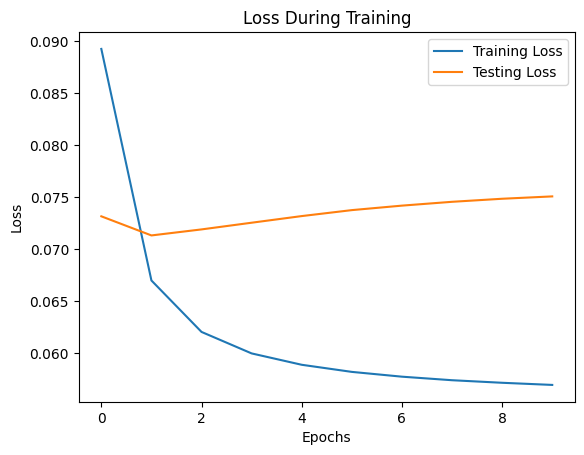

In [ ]:
# Plot training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss During Training')
plt.legend()
plt.show()

## Save model

melakukan save model agar menghemat waktu untuk evaluasi

In [ ]:
embedding_model.save('embedding_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Load Model

In [ ]:
embedding_path = '/content/drive/MyDrive/Colab Notebooks/embedding_model.h5'

# Load the saved model
embedding_model = load_model(embedding_path)
embedding_model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 user_input (InputLayer)     [(None, 1)]                  0         []                            
                                                                                                  
 anime_input (InputLayer)    [(None, 1)]                  0         []                            
                                                                                                  
 user_embedding (Embedding)  (None, 1, 128)               8537344   ['user_input[0][0]']          
                                                                                                  
 anime_embedding (Embedding  (None, 1, 128)               2247680   ['anime_input[0][0]']         
 )                                                                                          

## Extract Weights Model Embedding

hasil ekstrak bobot ini akan digunakan untuk memprediksi rating daalam Sistem Rekomendasi

In [ ]:
def extract_weights(name, model):
    weight_layer = model.get_layer(name)
    weights = weight_layer.get_weights()[0]
    weights = weights / np.linalg.norm(weights, axis = 1).reshape((-1, 1))
    return weights

anime_weights = extract_weights('anime_embedding', embedding_model)
user_weights = extract_weights('user_embedding', embedding_model)

# Prediction Evaluation

melihat evaluasi prediksi rating pada data testing menggunakan MSE

In [ ]:
predicted_ratings = embedding_model.predict([test_users, test_animes])  # Rating prediksi

mse = mean_squared_error(test_ratings, predicted_ratings)
print(f"Mean Squared Error: {mse}")


376785/376785 [==============================] - 347s 922us/step
Mean Squared Error: 0.07505408284875245


# System Recommendation

## Function Find Similar User

mencari kemiripan dari setiap user

In [ ]:
def find_similar_users(user_id, n=10, return_dist=False, neg=False):
  try:
        # Mendapatkan user_id encode
        encoded_user = user_encode.get(user_id)

        # Mengambil bobot embedding user
        weights = user_weights

        # Menghitung jarak antara user menggunakan dot product
        dists = np.dot(weights, weights[encoded_user])

        # Mengurutkan berdasarkan jarak (dari yang terjauh ke yang terdekat)
        sorted_dists = np.argsort(dists)

        # Menentukan jumlah user id yang ingin dicari
        n = n + 1

        if neg:
            closest = sorted_dists[:n]
        else:
            closest = sorted_dists[-n:]

        if return_dist:
            return dists, closest

        # Mengambil data anime dan memasukkan informasi ke dalam array
        SimilarityArr = []

        for close in closest:
            decoded_id = user_decode.get(close)

            similarity = dists[close]

            SimilarityArr.append({
                "simillar_usr": decoded_id,
                "similarity": similarity,
            })

        # Mengubah hasil ke dalam DataFrame dan mengurutkannya berdasarkan similarity
        Frame = pd.DataFrame(SimilarityArr).sort_values(by="similarity", ascending=False)

        # Mengembalikan hasil tanpa anime yang dicari
        return Frame[1:]

  except Exception as e:
        print(f"Error: {str(e)}")


In [ ]:
similar_users = find_similar_users(11165, n=10)
similar_users

,simillar_usr,similarity
9,1904,0.372000
8,32047,0.366350
7,21253,0.366204
6,2398,0.358111
5,45374,0.355703
4,29506,0.355546
3,26082,0.350306
2,51686,0.350185
1,45251,0.347976
0,8129,0.346848


## Function Find Favorite Genres User
mendapatkan top 10 genre favorite user

In [ ]:
def get_favorite_genres_user(user_id, rating_data, anime_data):

    # choice anime id by user id
    select_anime = rating_data[rating_data['user_id'] == user_id].anime_id.unique()
    anime_favorite = anime_data[anime_data['anime_id'].isin(select_anime)]

    genre_col = anime_favorite.columns[3:]
    anime_favorite[genre_col].sum().sort_values(ascending=False).head(10).index

    return anime_favorite[genre_col].sum().sort_values(ascending=False).head(10)


In [ ]:
get_favorite_genres_user(11165, user_rating_df, anime_df)

,0
comedy,255
action,183
sci-fi,178
adventure,160
drama,160
romance,139
fantasy,132
ecchi,56
hentai,49
supernatural,49


## Function Another favorite genre prediction

Memprediksi favorit genre lainnya dari kemiripan user

In [ ]:
def get_favorite_genres(similar_users, rating_data, anime_data):
    # Filter ratings by similar users
    user_ratings = rating_data[rating_data['user_id'].isin(similar_users['simillar_usr'].values)]

    # Merge with anime data to get genre information (one-hot encoded genres)
    merged_data = user_ratings.merge(anime_data, on='anime_id')

    # Calculate average rating per genre (considering one-hot encoding)
    genre_columns = [col for col in anime_data.columns if col not in ['anime_id', 'Name', 'Genres']]

    #convert to float
    merged_data[genre_columns] = merged_data[genre_columns].astype(float)

    # Multiply rating by one-hot encoded genre values, sum and average per genre
    genre_ratings = merged_data[genre_columns].multiply(merged_data['rating'], axis=0)

    # Calculate average rating per genre
    genre_preference = genre_ratings.sum(axis=0) / merged_data[genre_columns].sum(axis=0)

    # Sort genres by rating preference (highest to lowest)
    genre_preference = genre_preference.sort_values(ascending=False)

    return genre_preference

contoh genre favorite lainnya pada user_id = 11165

In [ ]:
# Example usage:
similar_users = find_similar_users(11165, n=10)
genre_preference = get_favorite_genres(similar_users, user_rating_df, anime_df)
genre_preference

,0
awardwinning,0.377387
girlslove,0.374627
ecchi,0.353147
erotica,0.353125
romance,0.352574
avantgarde,0.347368
sci-fi,0.344045
drama,0.342601
boyslove,0.340000
comedy,0.338346


## Recommendation Anime Based on Genre preferences User Similar(Hybrid Collaborative Filtering)

In [ ]:
def recommend_anime_for_user(user_id, rating_data, anime_data, top_n=20, sort_by='average_rating'):

    # get favorite genre by user_id
    favorite_genres_user = get_favorite_genres_user(user_id, rating_data, anime_data)

    # get simillar user and find other favorite genres
    similar_users = find_similar_users(user_id, n=top_n)
    favorite_genres = get_favorite_genres(similar_users, rating_data, anime_data)

    # Avoid anime favorite genres
    favorite_genres = favorite_genres[~favorite_genres.index.isin(favorite_genres_user.index)]

    # Filter anime data by favorite genres (one-hot encoded)
    favorite_genre_columns = favorite_genres.index[:3]  # Select top 3 favorite genres
    genre_filter = anime_data[favorite_genre_columns].sum(axis=1) > 0 # At least one favorite genre
    filtered_anime = anime_data[genre_filter]

    # Get anime already rated by the user
    rated_data = rating_data[rating_data['user_id'] == user_id]
    rated_anime = rated_data.anime_id.unique()

    unrated_anime = rating_data[~rating_data['anime_id'].isin(rated_anime)]

    # Exclude already rated anime
    recommendations = filtered_anime[~filtered_anime['anime_id'].isin(rated_anime)]

     # calce average rating
    # Hitung rata-rata rating untuk setiap anime
    anime_avg_rating = unrated_anime.groupby('anime_id')['rating'].mean().reset_index()
    anime_avg_rating.rename(columns={'rating': 'average_rating'}, inplace=True)

    # Gabungkan dengan dataset anime
    recommendations = recommendations.merge(anime_avg_rating, on='anime_id', how='left')

    # Hitung jumlah pengguna yang memberikan rating untuk setiap anime
    anime_popularity = unrated_anime.groupby('anime_id')['user_id'].count().reset_index()
    anime_popularity.rename(columns={'user_id': 'popularity'}, inplace=True)

    # Gabungkan dengan dataset anime
    recommendations = recommendations.merge(anime_popularity, on='anime_id', how='left')

    # Sort by a relevant metric (e.g., average rating or popularity)
    if sort_by == 'average_rating':
        recommendations = recommendations.sort_values(by='average_rating', ascending=False)
    elif sort_by == 'popularity':
        recommendations = recommendations.sort_values(by='popularity', ascending=False)

    set_columns = ['anime_id', 'Name', 'Genres', 'average_rating', 'popularity']
    # Return the top N recommendations
    return recommendations[set_columns].head(top_n).reset_index(drop=True)

In [ ]:
# Example usage:
user_id = 11165  # Replace with actual user_id

recommended_anime = recommend_anime_for_user(
    user_id=user_id,
    rating_data=user_rating_df,
    anime_data=anime_df,
    top_n=20,
    sort_by='average_rating'
)
recommended_anime

,anime_id,Name,Genres,average_rating,popularity
0,512,Majo no Takkyuubin,"[adventure, awardwinning, comedy, drama, fantasy]",0.661602,59047.0
1,1547,Obake no Q-tarou,"[comedy, sliceoflife, supernatural]",0.598700,51534.0
2,574,Rean no Tsubasa,"[awardwinning, fantasy, sci-fi]",0.584892,49549.0
3,943,Yume Tsukai,"[drama, fantasy, sliceoflife]",0.582954,33604.0
4,633,Legend of Basara,"[adventure, awardwinning, drama, fantasy, roma...",0.559222,34835.0
5,1967,Kidou Senshi Z Gundam I: Hoshi wo Tsugu Mono,"[awardwinning, drama, sci-fi]",0.558918,24427.0
6,1,Cowboy Bebop,"[action, awardwinning, sci-fi]",0.555919,52766.0
7,1566,Koukaku Kidoutai: Stand Alone Complex - Solid ...,"[awardwinning, mystery, sci-fi]",0.550389,27377.0
8,709,Mujin Wakusei Survive,"[action, adventure, fantasy, sci-fi, sliceoflife]",0.549686,48543.0
9,93,Kidou Senshi Gundam SEED,"[action, awardwinning, drama, romance, sci-fi]",0.549363,25294.0


# Evaluasi

## Evaluasi Rekomendasi Hybrid

membuat evaluasi dengan `precision`, `diversity`, dan `NDCG`

In [ ]:
def precision_at_k(recommended_items, relevant_items, k=10):
    recommended_items = recommended_items[:k]  # Ambil top k rekomendasi
    relevant_items = set(relevant_items)  # Set relevansi untuk mempermudah pencocokan
    relevant_count = sum(1 for item in recommended_items if item in relevant_items)
    return relevant_count / k

def calculate_diversity(recommended_items, cosine_sim=cosine_similarity(mlb.fit_transform(anime_df['Genres']))):
    # Mengambil indeks dari anime yang direkomendasikan
    recommended_indices = [anime_df[anime_df['anime_id'] == item].index[0] for item in recommended_items]

    # Mengambil cosine similarity antar anime yang direkomendasikan
    sim_matrix = cosine_sim[recommended_indices, :][:, recommended_indices]

    # Menghitung rata-rata similarity, kemudian dikurangkan dari 1 untuk mendapatkan diversity
    mean_similarity = np.mean(sim_matrix)
    diversity = 1 - mean_similarity
    return diversity

def ndcg_at_k(recommended_items, relevant_items, k=10):
    recommended_items = recommended_items[:k]
    dcg = 0
    idcg = 0

    # Hitung DCG (Discounted Cumulative Gain)
    for i, item in enumerate(recommended_items):
        if item in relevant_items:
            dcg += 1 / np.log2(i + 2)  # Menambahkan relevansi terdiskon

    # Pastikan hanya item yang ada di recommended_items yang dipertimbangkan untuk IDCG
    relevant_in_recommended = [item for item in relevant_items if item in recommended_items]

    # Hitung IDCG (Ideal DCG) yaitu DCG pada ranking yang ideal
    for i, item in enumerate(relevant_in_recommended[:k]):
        idcg += 1 / np.log2(i + 2)

    # Menghindari pembagian dengan nol
    if idcg == 0:
        return 0
    return dcg / idcg


Melakukan inisialisasi dengan memberikan `top k = 20` serta list untuk menampung evaluasi sistem rekomendasi, serta menampung user unique dari data `test_user`. Sampel yang akan di evaluasi sebanyak `100` sample

In [ ]:
k = 20

all_precision = []
all_diversity = []
all_ndcg = []
user_unique = test['user_id'].unique()[:300]

Melakukan evaluasi sistem rekomendasi setiap user dengan metrik yang telah ditentukan

In [ ]:
for i,user_index in enumerate(user_unique):
    relevant_items = test[test['user_id'] == user_index]['anime_id'].tolist()
    recommended_items = recommend_anime_for_user(user_index, train, anime_df).head(k)['anime_id'].tolist()

    precision = precision_at_k(recommended_items, relevant_items, k)
    diversity = calculate_diversity(recommended_items)
    ndcg = ndcg_at_k(recommended_items, relevant_items, k)

    all_precision.append(precision)
    all_diversity.append(diversity)
    all_ndcg.append(ndcg)

    print(f"proses user ke -{i+1} user = {user_index} precision = {precision} diversity = {diversity} ndcg = {ndcg}")


proses user ke -1 user = 13193 precision = 0.1 diversity = 0.5383115066866107 ndcg = 0.9197207891481876
proses user ke -2 user = 11165 precision = 0.05 diversity = 0.6174357638374508 ndcg = 1.0
proses user ke -3 user = 48097 precision = 0.1 diversity = 0.6858256467954448 ndcg = 0.5437713091520254
proses user ke -4 user = 47538 precision = 0.1 diversity = 0.5934299320409828 ndcg = 0.9197207891481876
proses user ke -5 user = 46118 precision = 0.1 diversity = 0.5749963397815281 ndcg = 0.4911492931622974
proses user ke -6 user = 55139 precision = 0.15 diversity = 0.5749509315083785 ndcg = 0.5377082225242766
proses user ke -7 user = 24665 precision = 0.3 diversity = 0.590340759239826 ndcg = 0.7757449399098547
proses user ke -8 user = 26579 precision = 0.15 diversity = 0.6835615652264315 ndcg = 0.7109050375811679
proses user ke -9 user = 7863 precision = 0.1 diversity = 0.68892292714985 ndcg = 0.37679308663404665
proses user ke -10 user = 21499 precision = 0.05 diversity = 0.5708714014434937

In [ ]:
print(f"Precision{k}: {np.mean(all_precision)}")
print(f"Diversity@{k}: {np.mean(all_diversity)}")
print(f"NDCG@{k}: {np.mean(all_ndcg)}")

Precision20: 0.17616666666666664
Diversity@20: 0.5914255061376474
NDCG@20: 0.6003221567743854


## Visualisasi Evaluasi setiap metrik

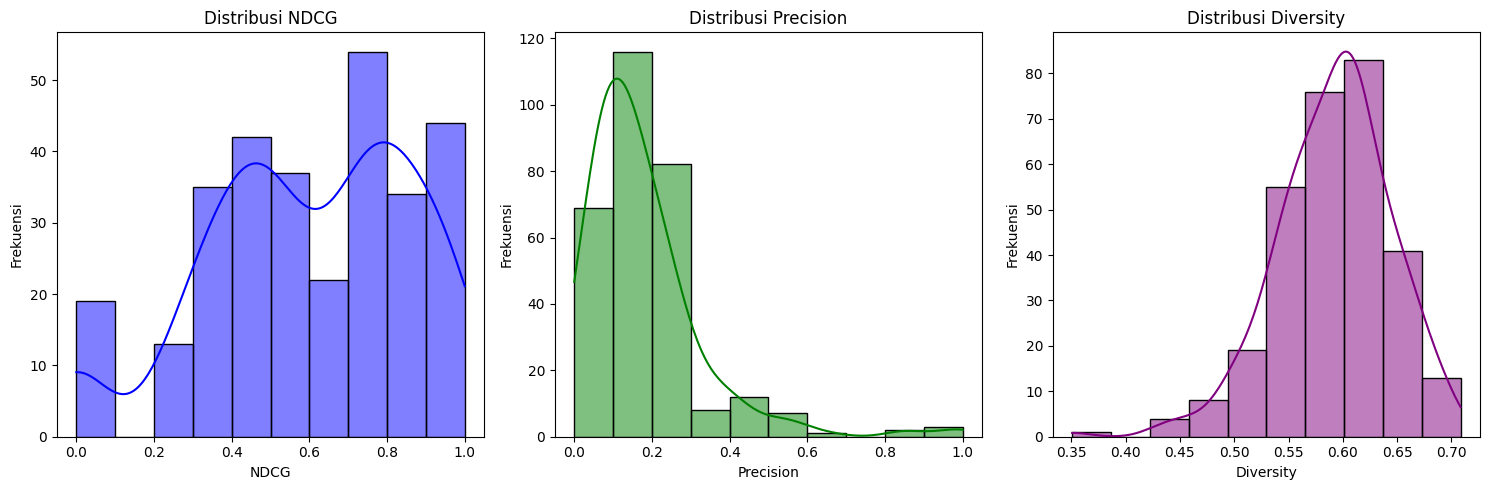

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(all_ndcg, kde=True, bins=10, color='blue')
plt.title('Distribusi NDCG')
plt.xlabel('NDCG')
plt.ylabel('Frekuensi')

plt.subplot(1, 3, 2)
sns.histplot(all_precision, kde=True, bins=10, color='green')
plt.title('Distribusi Precision')
plt.xlabel('Precision')
plt.ylabel('Frekuensi')

plt.subplot(1, 3, 3)
sns.histplot(all_diversity, kde=True, bins=10, color='purple')
plt.title('Distribusi Diversity')
plt.xlabel('Diversity')
plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()